In [201]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline



In [60]:
from nilearn import image, plotting
from atlasreader.atlasreader import read_atlas_peak

"""
available reference atlases
---------------------------
    "aal",
    "aicha",
    "desikan_killiany",
    "destrieux",
    "harvard_oxford",
    "juelich",
    "marsatlas",
    "neuromorphometrics",
    "talairach_ba",
    "talairach_gyrus",
 """

atlas = image.threshold_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz", "99.5%") 
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
brain_region = []
print("BRAIN REGIONS:\n--------------")
for atlas_coord in atlas_coords:
    region = read_atlas_peak("harvard_oxford", atlas_coord)
    print(region)
    brain_region += [region]

BRAIN REGIONS:
--------------
[[62.0, 'Right_Occipital_Pole']]
[[50.0, 'Right_Lateral_Occipital_Cortex_superior_division'], [30.0, 'Right_Angular_Gyrus']]
[[56.0, 'Right_Lateral_Occipital_Cortex_inferior_division'], [14.0, 'Right_Occipital_Pole']]
[[54.0, 'Left_Cuneal_Cortex'], [9.0, 'Right_Cuneal_Cortex']]
[[81.0, 'Left_Supramarginal_Gyrus_anterior_division'], [6.0, 'Left_Supramarginal_Gyrus_posterior_division']]
[[85.0, 'Right_Lateral_Occipital_Cortex_superior_division']]
[[66.0, 'Right_Supramarginal_Gyrus_posterior_division'], [14.0, 'Right_Angular_Gyrus']]
[[68.0, 'Right_Lateral_Occipital_Cortex_superior_division']]
[[72.0, 'Left_Lateral_Occipital_Cortex_superior_division']]
[[49.0, 'Right_Precuneous_Cortex'], [30.0, 'Left_Precuneous_Cortex']]
[[47.0, 'Right_Occipital_Fusiform_Gyrus'], [26.0, 'Right_Lingual_Gyrus']]
[[46.0, 'Left_Angular_Gyrus'], [22.0, 'Left_Supramarginal_Gyrus_posterior_division'], [7.0, 'Left_Lateral_Occipital_Cortex_superior_division']]
[[45.0, 'Left_Lateral_Oc

In [61]:
#select the correct region with largest probability given from the library
brain_region = [
    max(inner_list, key=lambda x: x[0])[-1] if inner_list else None for inner_list in brain_region
]
brain_region

['Right_Occipital_Pole',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Lateral_Occipital_Cortex_inferior_division',
 'Left_Cuneal_Cortex',
 'Left_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Right_Supramarginal_Gyrus_posterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Right_Precuneous_Cortex',
 'Right_Occipital_Fusiform_Gyrus',
 'Left_Angular_Gyrus',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Precuneous_Cortex',
 'Right_Occipital_Pole',
 'Right_Intracalcarine_Cortex',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Left_Lateral_Occipital_Cortex_superior_division',
 'Left_Postcentral_Gyrus',
 'Left_Superior_Frontal_Gyrus',
 'Right_Supramarginal_Gyrus_anterior_division',
 'Right_Lateral_Occipital_Cortex_superior_division',
 'Left_Occipital_Pole',
 'Lef

In [62]:
open_access_data = pd.read_csv("unrestricted_juzhuoxuan_12_4_2024_1_36_25.csv")
restricted_data = pd.read_csv("RESTRICTED_juzhuoxuan_12_5_2024_14_20_0.csv")
subject_data = open_access_data.merge(restricted_data, how = 'inner', on = 'Subject')

folder = 'HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2'
brain_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
brain_data = {}

for filename in brain_files:
    subject_id = int(filename[:6])
    file_path = os.path.join(folder, filename)
    subject_brain_data = np.loadtxt(file_path)
    brain_data[subject_id] = subject_brain_data

brain_data_df = pd.DataFrame({
    'Subject': list(brain_data.keys()),
    'Brain_Data': list(brain_data.values())  # (4800, 100) arrays
})
brain_data_df

data = subject_data.merge(brain_data_df, on='Subject', how='inner')


In [63]:
data.head()

Subject Release Acquisition Gender    Age  3T_Full_MR_Compl  T1_Count  \
0   100206    S900         Q11      M  26-30              True         1   
1   100307      Q1         Q01      F  26-30              True         1   
2   100408      Q3         Q03      M  31-35              True         1   
3   100610    S900         Q08      M  26-30              True         2   
4   101006    S500         Q06      F  31-35              True         2   

   T2_Count  3T_RS-fMRI_Count  3T_RS-fMRI_PctCompl  ...  \
0         1                 4                100.0  ...   
1         1                 4                100.0  ...   
2         1                 4                100.0  ...   
3         1                 4                100.0  ...   
4         2                 4                100.0  ...   

   SSAGA_Times_Used_Cocaine  SSAGA_Times_Used_Hallucinogens  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       5.0                             5.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   SSAGA_Times_Used_Opiates  SSAGA_Times_Used_Sedatives  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       5.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   SSAGA_Times_Used_Stimulants  SSAGA_Mj_Use  SSAGA_Mj_Ab_Dep  \
0                          0.0           0.0              0.0   
1                          0.0           1.0              0.0   
2                          0.0           1.0              1.0   
3                          0.0           0.0              0.0   
4                          0.0           1.0              0.0   

   SSAGA_Mj_Age_1st_Use  SSAGA_Mj_Times_Used  \
0                   NaN                  0.0   
1                   2.0                  1.0   
2                   2.0                  4.0   
3                   NaN                  0.0   
4                   2.0                  5.0   

                                          Brain_Data  
0  [[-17.817, 6.4591, 75.159, 63.752, -3.8965, 28...  
1  [[21.753, 3.6099, -23.662, -15.485, 60.84, -18...  
2  [[112.55, -54.284, -51.51, -62.453, 90.959, 95...  
3  [[-113.14, -91.451, -16.406, 13.531, 169.7, -3...  
4  [[-177.94, -107.2, -124.42, -44.5, 5.1172, 15....  

[5 rows x 783 columns]

In [64]:
data["Handedness_Cat"] = data["Handedness"].apply(lambda x: "Left" if x < 0 else "Right")

In [65]:
hand_data = data[["Subject", "Gender", "Race", "Handedness", "Handedness_Cat"]]
hand_data

Subject Gender                  Race  Handedness Handedness_Cat
0      100206      M                 White          65          Right
1      100307      F                 White          95          Right
2      100408      M                 White          55          Right
3      100610      M                 White          85          Right
4      101006      F  Black or African Am.          90          Right
...       ...    ...                   ...         ...            ...
998    992673      F                 White          70          Right
999    992774      M                 White         100          Right
1000   993675      F                 White          85          Right
1001   994273      M                 White          60          Right
1002   996782      F                 White         100          Right

[1003 rows x 5 columns]

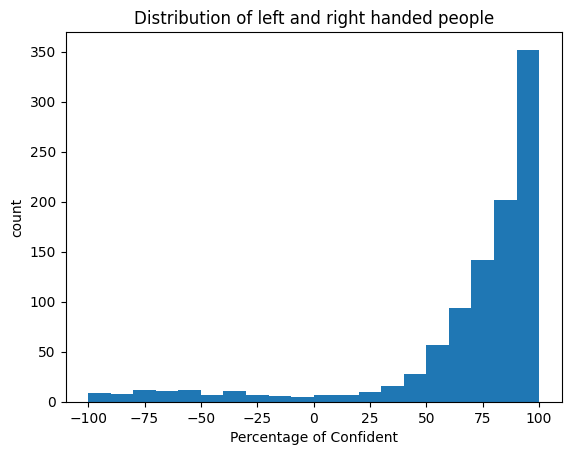

In [66]:
plt.hist(hand_data["Handedness"], bins = 20)
plt.xlabel("Percentage of Confident")
plt.ylabel("count")
plt.title("Distribution of left and right handed people")
plt.show();

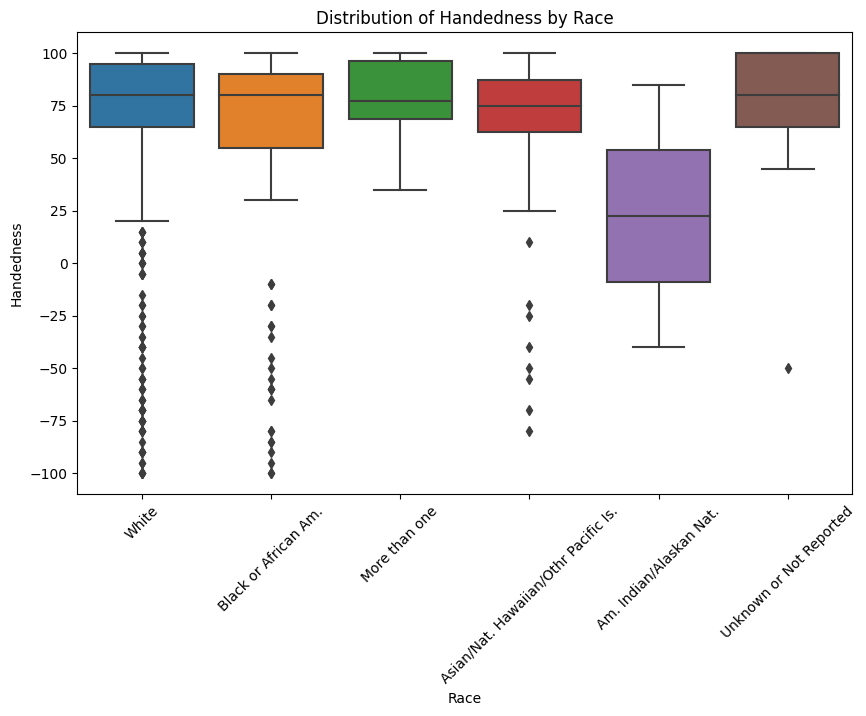

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hand_data, x='Race', y='Handedness')
plt.title("Distribution of Handedness by Race")
plt.xlabel("Race")
plt.ylabel("Handedness")
plt.xticks(rotation=45)
plt.show()

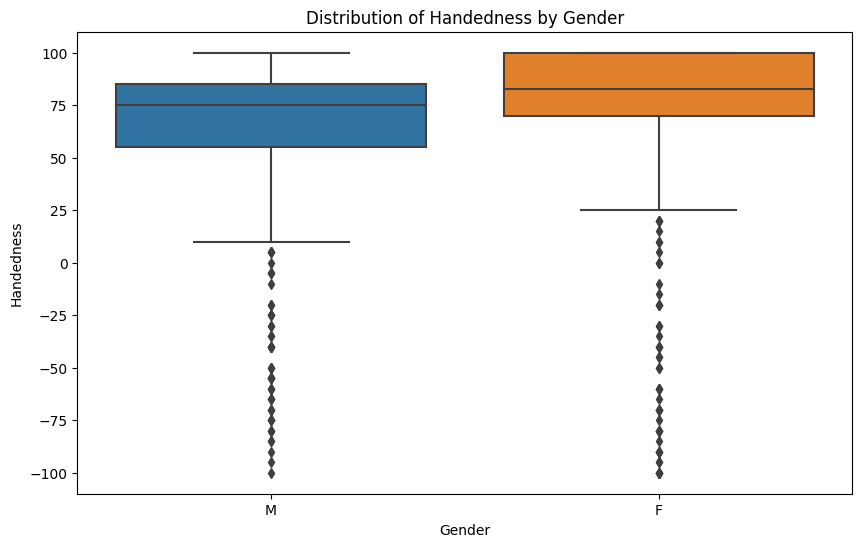

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hand_data, x='Gender', y='Handedness')
plt.title("Distribution of Handedness by Gender")
plt.xlabel("Gender")
plt.ylabel("Handedness")
plt.show()

In [69]:
hand_data.groupby(["Gender", "Handedness"])[["Subject"]].count()

Subject
Gender Handedness         
F      -100              5
       -95               2
       -90               4
       -85               1
       -80               4
...                    ...
M       80              70
        85              30
        90              36
        95              26
        100             51

[77 rows x 1 columns]

In [70]:
hand_data.groupby(["Gender", "Handedness_Cat"])[["Subject"]].count()

Subject
Gender Handedness_Cat         
F      Left                 40
       Right               494
M      Left                 48
       Right               421

### Correlation Matrix

#### one example

In [71]:
test_data = data["Brain_Data"][0]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


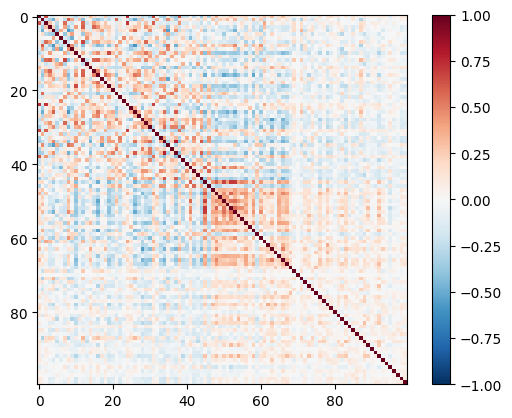

In [72]:
plt.figure()
plt.imshow(np.corrcoef(test_data.T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
plt.colorbar()
plt.show()


try for all

In [100]:
correlation_matrix_list = []
for i in range(data.shape[0]):
    person = data["Brain_Data"][i]
    #get matrix
    person_matrix = np.corrcoef(person.T)
    #append to list
    correlation_matrix_list.append(person_matrix)
#append to column
data["correlation_matrix"] = correlation_matrix_list

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


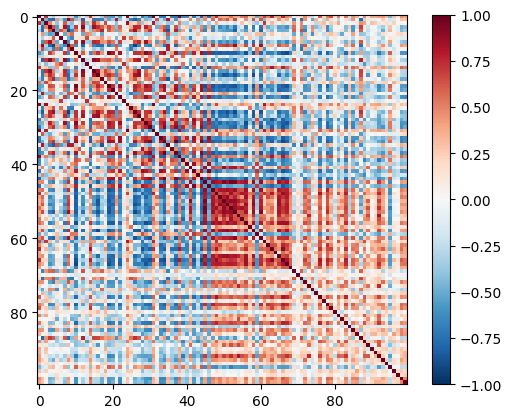

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


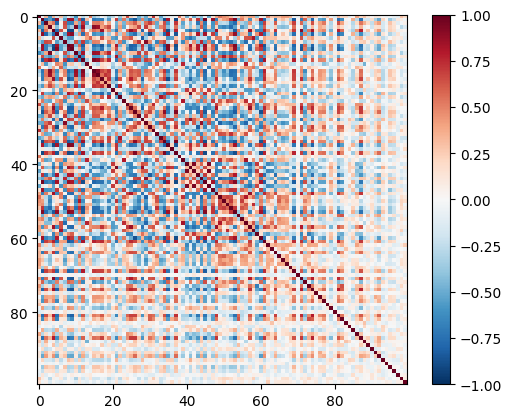

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


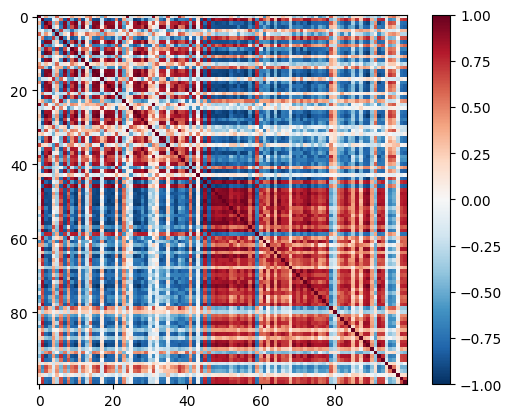

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


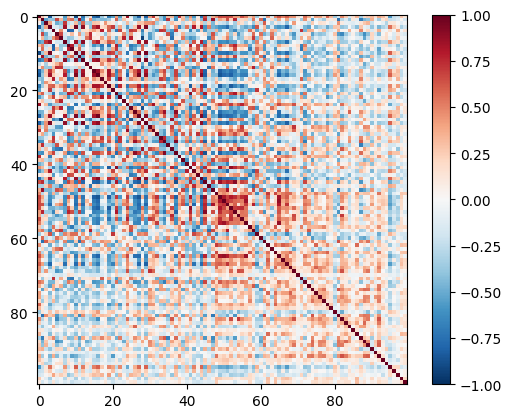

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


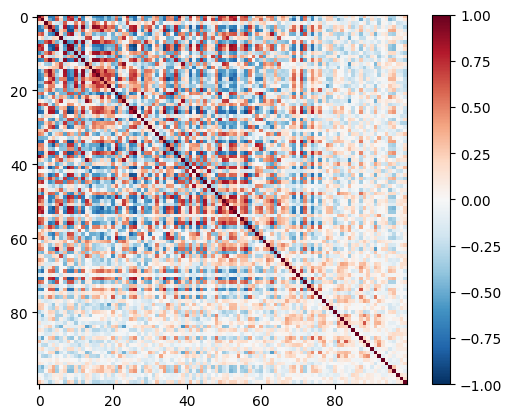

In [101]:
# plot first 5
for i in range(5):
    plt.figure()
    plt.imshow(np.corrcoef(correlation_matrix_list[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()


#### Divided into left and right

In [104]:
left_data = data.loc[data["Handedness_Cat"] == "Left", :]
right_data = data.loc[data["Handedness_Cat"] == "Right", :]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


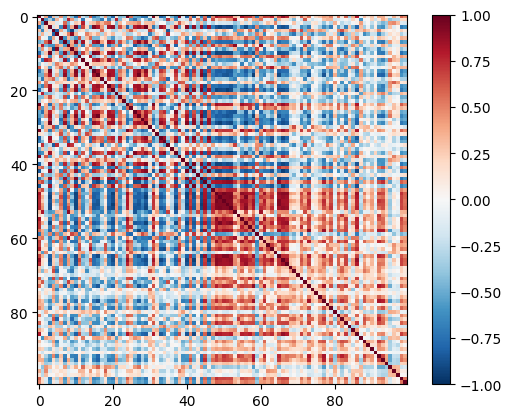

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


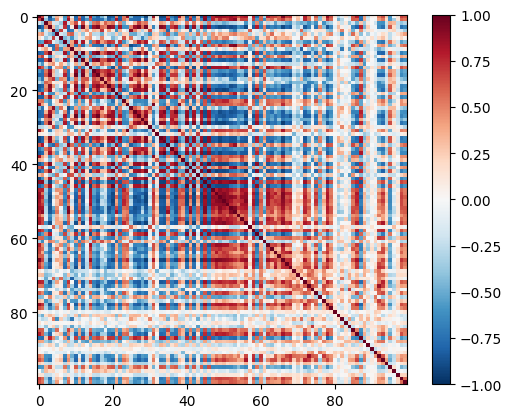

In [105]:
for i in range(2):
    plt.figure()
    plt.imshow(np.corrcoef(left_data["correlation_matrix"].iloc[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


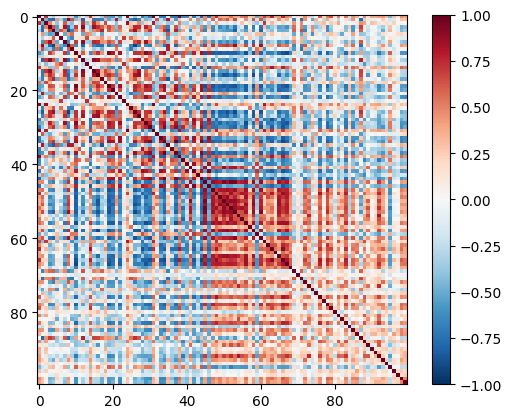

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


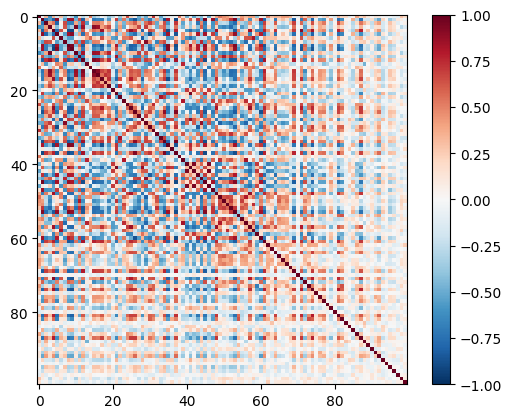

In [106]:
for i in range(2):
    plt.figure()
    plt.imshow(np.corrcoef(right_data["correlation_matrix"].iloc[i].T), cmap="RdBu_r", interpolation="none", vmin = -1, vmax = 1)
    plt.colorbar()
    plt.show()

### Explore for possible features

In [107]:
#correlation matrix

In [108]:
#left 
#MTG.L
    #Left_Middle_Temporal_Gyrus_posterior_division
#ACC.L
    #Left_Paracingulate_Gyrus
#MCC.L
    #Left_Paracingulate_Gyrus

In [164]:
filtered_df = data[(data['Handedness'] > 25) | (data['Handedness'] < -25)]

# Separate into left and right handed
left_handed = filtered_df[filtered_df['Handedness'] < 0]
right_handed = filtered_df[filtered_df['Handedness'] > 0]

# Determine the number of samples to select from the right-handed data
num_samples = min(len(left_handed), len(right_handed))

# Randomly sample from the right-handed data
right_handed_sample = right_handed.sample(n=num_samples, random_state=42)

# Combine the left and right handed data
final_df = pd.concat([left_handed, right_handed_sample])

# Optionally shuffle the final dataframe to mix left and right handed samples
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

data = final_df

In [165]:
def feature_row_get(target):
    target_index = brain_region.index(target)
    target_row = data['correlation_matrix'].apply(lambda x: x[target_index])
    return target_row

In [166]:
semi_MTG = feature_row_get("Left_Middle_Temporal_Gyrus_posterior_division")
semi_ACC = feature_row_get("Left_Paracingulate_Gyrus")
semi_MCC = feature_row_get("Left_Paracingulate_Gyrus")

In [167]:
#right
#ANG.R
    #Right_Superior_Parietal_Lobule
    #Right_Supramarginal_Gyrus_posterior_division
    #Right_Supramarginal_Gyrus_anterior_division
#AMYG.R

In [168]:
semi_ANG_1 = feature_row_get("Right_Superior_Parietal_Lobule")
semi_ANG_2 = feature_row_get("Right_Supramarginal_Gyrus_posterior_division")
semi_ANG_3 = feature_row_get("Right_Supramarginal_Gyrus_anterior_division")

In [197]:
feature_data = data[["Handedness", "Handedness_Cat", "correlation_matrix"]]
feature_data['matrix_mean'] = data['correlation_matrix'].apply(lambda x: np.mean(x))
feature_data["semi_MTG"] = semi_MTG
feature_data["semi_ACC"] = semi_ACC
feature_data["semi_MCC"] = semi_MCC

feature_data["semi_ANG_1"] = semi_ANG_1
feature_data["semi_ANG_2"] = semi_ANG_2
feature_data["semi_ANG_3"] = semi_ANG_3


/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2459330131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['matrix_mean'] = data['correlation_matrix'].apply(lambda x: np.mean(x))
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2459330131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data["semi_MTG"] = semi_MTG
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2459330131.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [170]:
feature_data

Handedness Handedness_Cat  matrix_mean  \
0            80          Right     0.017380   
1           -55           Left     0.011658   
2           100          Right     0.013780   
3          -100           Left     0.014471   
4            80          Right     0.011706   
..          ...            ...          ...   
143         -65           Left     0.015138   
144          55          Right     0.018240   
145         -75           Left     0.016347   
146          70          Right     0.014632   
147          50          Right     0.009549   

                                              semi_MTG  \
0    [-0.141832661814035, 0.1483619880206003, -0.10...   
1    [-0.14125124176299603, -0.019051396586662585, ...   
2    [0.10178560729345167, 0.4597613026970792, 0.10...   
3    [0.2791964913686674, 0.2375368920718849, 0.130...   
4    [0.038944917323615554, -0.023400675659995523, ...   
..                                                 ...   
143  [-0.13310289937310554, 0.1539777378335841, 0.0...   
144  [-0.0020011926082503803, 0.13921877018038842, ...   
145  [-0.016113362936909348, 0.030991061921064992, ...   
146  [-0.1413312349375334, 0.30969099143941275, 0.0...   
147  [0.11284315571002554, 0.17789023252052186, 0.2...   

                                              semi_ACC  \
0    [0.00825160328982644, 0.3234300317654682, -0.2...   
1    [0.021768097452149655, 0.2627464030799337, -0....   
2    [0.2306526519827257, 0.5057968993422983, -0.02...   
3    [0.14418196931686442, 0.21798317960809288, 0.0...   
4    [0.31490387663483926, 0.15829603645375773, 0.0...   
..                                                 ...   
143  [0.08021064904187589, 0.38430733394426886, -0....   
144  [0.13847332836388027, 0.313768865124698, -0.09...   
145  [0.13563360651687517, 0.0700069631276517, -0.1...   
146  [-0.10388758974108625, 0.30387256906767174, -0...   
147  [0.12189671153799468, 0.36652761626717917, -0....   

                                              semi_MCC  \
0    [0.00825160328982644, 0.3234300317654682, -0.2...   
1    [0.021768097452149655, 0.2627464030799337, -0....   
2    [0.2306526519827257, 0.5057968993422983, -0.02...   
3    [0.14418196931686442, 0.21798317960809288, 0.0...   
4    [0.31490387663483926, 0.15829603645375773, 0.0...   
..                                                 ...   
143  [0.08021064904187589, 0.38430733394426886, -0....   
144  [0.13847332836388027, 0.313768865124698, -0.09...   
145  [0.13563360651687517, 0.0700069631276517, -0.1...   
146  [-0.10388758974108625, 0.30387256906767174, -0...   
147  [0.12189671153799468, 0.36652761626717917, -0....   

                                            semi_ANG_1  \
0    [-0.0829703332254733, -0.23222308511384468, -0...   
1    [-0.08389789985195431, -0.2723744256804363, -0...   
2    [-0.3260470010101685, -0.49981589803465937, -0...   
3    [0.02242165314453297, -0.20377652342189737, 0....   
4    [-0.006831497724980512, -0.24729398400087826, ...   
..                                                 ...   
143  [-0.19730733482265622, -0.3997864495403133, -0...   
144  [0.0894434474135857, -0.4092806710773274, 0.11...   
145  [-0.12592866905968633, -0.3224459380904006, 0....   
146  [-0.07469502591216728, -0.513103013064021, 0.1...   
147  [-0.06737110803733054, -0.20290424111424835, -...   

                                            semi_ANG_2  \
0    [0.053298507949458646, 0.13779057472211853, -0...   
1    [-0.03718791698294677, 0.2610674883669684, -0....   
2    [-0.09327876532897941, 0.005523468666312566, -...   
3    [0.003805800708761077, 0.15025050216788033, -0...   
4    [-0.06067988780419291, 0.1835514723209336, -0....   
..                                                 ...   
143  [-0.06539604738417289, 0.0744180207887127, -0....   
144  [0.027208356118529328, 0.2439754560891782, -0....   
145  [-0.0030035065102160027, 0.27343103651318873, ...   
146  [0.014416261738293882, 0.2575846957244921, -0....   
147  [-0.00277

#### SVM in avg 

In [182]:
# Selecting features and target
feature_data['avg_semi_MTG'] = feature_data['semi_MTG'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ACC'] = feature_data['semi_ACC'].apply(lambda x: np.mean(x))
feature_data['avg_semi_MCC'] = feature_data['semi_MCC'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ANG_1'] = feature_data['semi_ANG_1'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ANG_2'] = feature_data['semi_ANG_2'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ANG_3'] = feature_data['semi_ANG_3'].apply(lambda x: np.mean(x))
X = feature_data[['avg_semi_MTG', 'avg_semi_ACC', 'avg_semi_MCC', 'avg_semi_ANG_1', 'avg_semi_ANG_2', 'avg_semi_ANG_3']]
y = feature_data["Handedness"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = SVC(kernel='linear')

# Train the model
model.fit(X_train_scaled, y_train)

# Predicting the test results
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)

0.03333333333333333


/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2573708893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['avg_semi_MTG'] = feature_data['semi_MTG'].apply(lambda x: np.mean(x))
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2573708893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['avg_semi_ACC'] = feature_data['semi_ACC'].apply(lambda x: np.mean(x))
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/2573708893.py:4: Settin

#### SVM in classes in avg

In [272]:
feature_data['avg_semi_MTG'] = feature_data['semi_MTG'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ACC'] = feature_data['semi_ACC'].apply(lambda x: np.mean(x))
feature_data['avg_semi_MCC'] = feature_data['semi_MCC'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ANG_1'] = feature_data['semi_ANG_1'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ANG_2'] = feature_data['semi_ANG_2'].apply(lambda x: np.mean(x))
feature_data['avg_semi_ANG_3'] = feature_data['semi_ANG_3'].apply(lambda x: np.mean(x))

X = feature_data[['avg_semi_MTG', 'avg_semi_ACC', 'avg_semi_MCC', 'avg_semi_ANG_1', 'avg_semi_ANG_2', 'avg_semi_ANG_3']]
y = feature_data["Handedness_Cat"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of SVM Model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy of SVM Model: 0.6333333333333333
Confusion Matrix:
 [[11  3]
 [ 8  8]]


/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/337923258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['avg_semi_MTG'] = feature_data['semi_MTG'].apply(lambda x: np.mean(x))
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/337923258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['avg_semi_ACC'] = feature_data['semi_ACC'].apply(lambda x: np.mean(x))
/var/folders/jh/ps5v6_894_12xsq30qyrh91m0000gn/T/ipykernel_58125/337923258.py:3: SettingWi

#### SVM with extend feature

##### Score

In [270]:
def flatten_features(row):
    """
    Given a single row of the DataFrame,
    return a 1D numpy array of all features to be used by the model.
    """
    # Example: Flatten correlation_matrix (if it's a 2D 3x3 matrix, that becomes 9 values)
    corr_mat = np.array(row["correlation_matrix"]).flatten()
    
    # Flatten each 'semi_*' array (each is length 3 in your example)
    semi_MTG = np.array(row["semi_MTG"])
    semi_ACC = np.array(row["semi_ACC"])
    semi_MCC = np.array(row["semi_MCC"])
    semi_ANG_1 = np.array(row["semi_ANG_1"])
    semi_ANG_2 = np.array(row["semi_ANG_2"])
    semi_ANG_3 = np.array(row["semi_ANG_3"])
    
    # Concatenate them into one array
    all_features = np.concatenate([
        corr_mat,
        semi_MTG, semi_ACC, semi_MCC,
        semi_ANG_1, semi_ANG_2, semi_ANG_3
    ])
    
    return all_features

# Now apply this function to each row in the DataFrame to create your X matrix:
X_list = feature_data.apply(flatten_features, axis=1)
# X_list will be a column of arrays. Convert to a 2D array:
X = np.vstack(X_list.values)

# y is simply the "Handedness" column:
y = feature_data["Handedness"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

# Build an SVR pipeline (with feature scaling)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=1.0, epsilon=0.1))
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate on the test set
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
print("R² on the test set:", score)


R² on the test set: -0.28151913904504


##### class

In [263]:
y = feature_data["Handedness_Cat"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


model_class = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0))
])
model_class.fit(X_train, y_train)
y_pred = model_class.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of SVM Model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy of SVM Model: 0.6666666666666666
Confusion Matrix:
 [[ 7  9]
 [ 1 13]]
